In [32]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Batch04.csv')

In [2]:
df.head()

SEX  AGEGRP  REGION  REFILL_COUNT  ADMTYP  Total Knee Arthrolplasty  \
0    2       5       3             1       1                         0   
1    2       5       3             1       1                         1   
2    1       5       3             1       1                         0   
3    2       5       3             7       1                         0   
4    2       5       3             7       1                         1   

   OSTEOARTHROSIS secondary lower leg  Removal of Foreign Body from Eye  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   1                                 0   
4                                   1                                 1   

   Total Knee Replacement  OSTEOARTHROSIS primary lower leg  \
0                       0                                 0   
1                       1                                 0   
2                       0                                 0   
3                       1                                 0   
4                       1                                 0   

   OSTEOARTHROSIS generalized lower leg  TOTAL HIP ANTHROPLASTY  \
0                                     0                       0   
1                                     1                       0   
2                                     0                       0   
3                                     0                       0   
4                                     1                       0   

   FASCIOLOPSIASIS  TOTAL HIP REPLACEMENT  Medicine  
0                0                      0         1  
1                0                      0         1  
2                0                      0         2  
3                0                      0         1  
4                0                      0         1

In [5]:
df['AGEGRP'].head()

0    5
1    5
2    5
3    5
4    5
Name: AGEGRP, dtype: int64

In [6]:
a=np.unique(df['AGEGRP'],return_counts=True)

In [7]:
a

(array([1, 2, 3, 4, 5], dtype=int64), array([  14, 1455, 2181, 3892, 3958]))

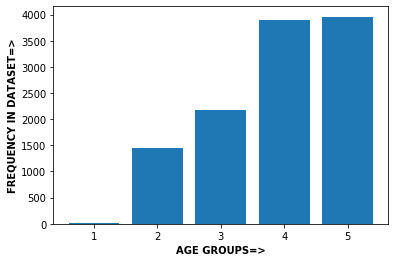

In [8]:
plt.bar(a[0],a[1])
plt.xlabel('AGE GROUPS=>',fontweight="bold")
plt.ylabel('FREQUENCY IN DATASET=>',fontweight="bold")
plt.savefig('AGE GRPS FREQUENCY IN DATASET.png')

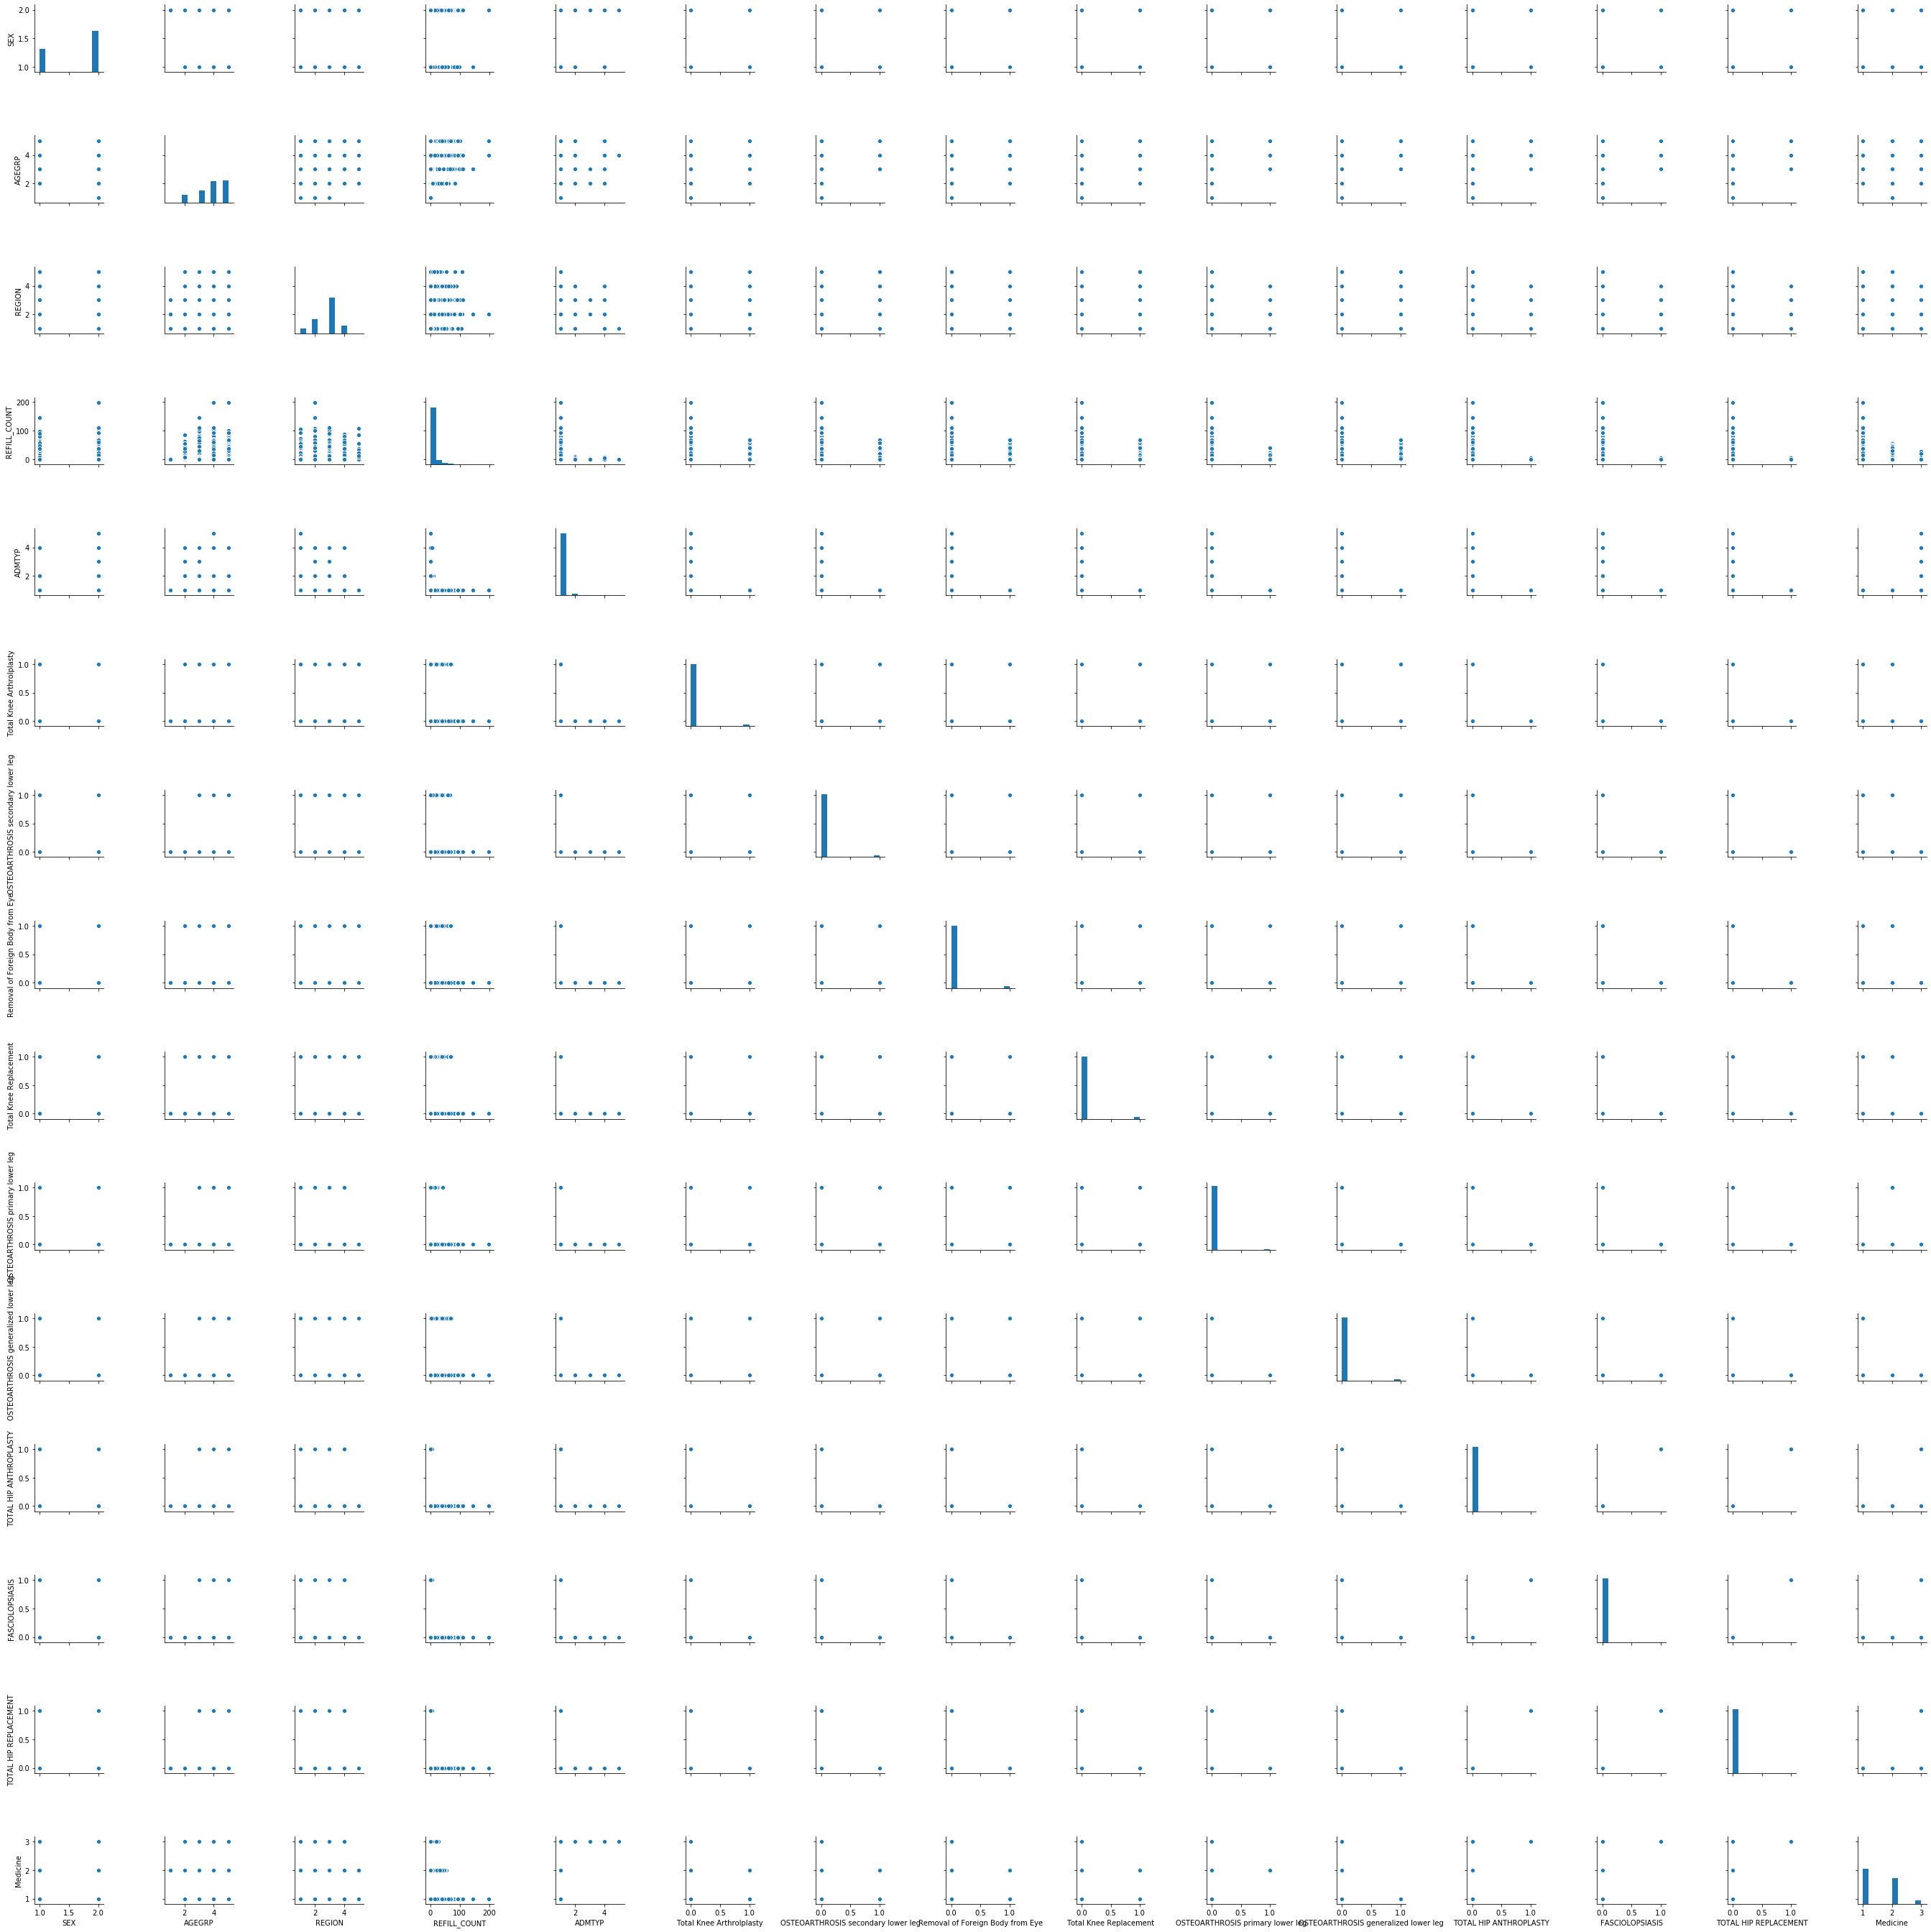

<Figure size 1152x1152 with 0 Axes>

In [9]:
sns.pairplot(df, diag_kind='hist')
plt.figure(figsize=(16,16))
plt.savefig('Pairplot.png')

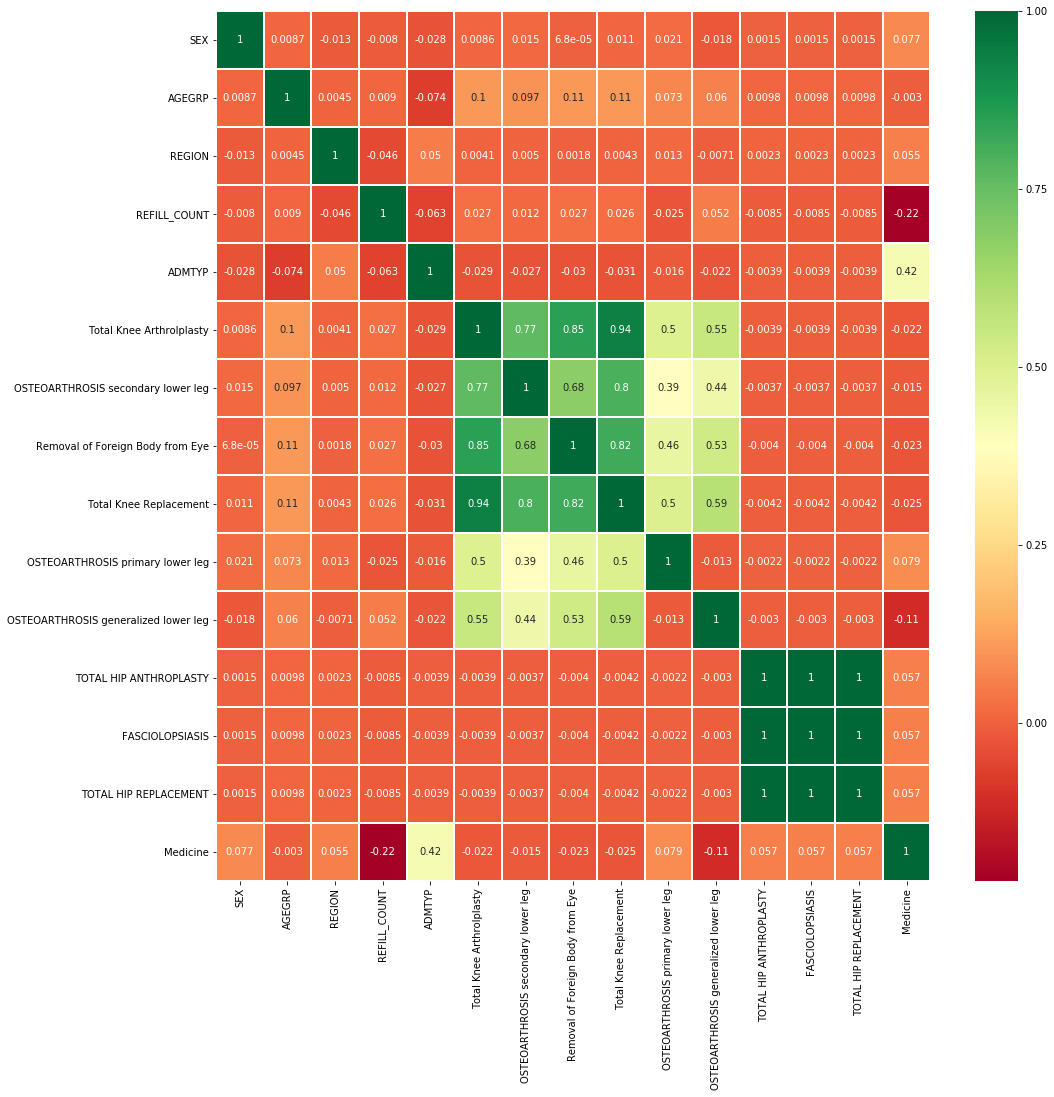

In [10]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn",linewidth=1)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!
plt.savefig('Correlation_Matrix_t.png')

In [11]:
df.isnull().any().sum()

0

In [12]:
df_u=pd.read_csv('correalted_dropped_data.csv')

In [15]:
a=df_u['REFILL_COUNT'].values

In [22]:
df_u.drop('REFILL_COUNT',axis=1,inplace=True)

In [23]:
df_u['REFILL_COUNT']=a

In [24]:
df_u.head()

S.NO  SEX  AGEGRP  REGION  ADMTYP  Total Knee Arthrolplasty  \
0     0    2       5       3       1                         0   
1     1    2       5       3       1                         1   
2     2    1       5       3       1                         0   
3     3    2       5       3       1                         0   
4     4    2       5       3       1                         1   

   OSTEOARTHROSIS secondary lower leg  Removal of Foreign Body from Eye  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   1                                 0   
4                                   1                                 1   

   OSTEOARTHROSIS primary lower leg  OSTEOARTHROSIS generalized lower leg  \
0                                 0                                     0   
1                                 0                                     1   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     1   

   TOTAL HIP ANTHROPLASTY  Medicine  REFILL_COUNT  
0                       0         1             1  
1                       0         1             1  
2                       0         2             1  
3                       0         1             7  
4                       0         1             7

In [25]:
df2=df_u.copy()

In [26]:
df2.head()

S.NO  SEX  AGEGRP  REGION  ADMTYP  Total Knee Arthrolplasty  \
0     0    2       5       3       1                         0   
1     1    2       5       3       1                         1   
2     2    1       5       3       1                         0   
3     3    2       5       3       1                         0   
4     4    2       5       3       1                         1   

   OSTEOARTHROSIS secondary lower leg  Removal of Foreign Body from Eye  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   1                                 0   
4                                   1                                 1   

   OSTEOARTHROSIS primary lower leg  OSTEOARTHROSIS generalized lower leg  \
0                                 0                                     0   
1                                 0                                     1   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     1   

   TOTAL HIP ANTHROPLASTY  Medicine  REFILL_COUNT  
0                       0         1             1  
1                       0         1             1  
2                       0         2             1  
3                       0         1             7  
4                       0         1             7

In [29]:
def traintestsplit(df,splitsize):
    
    X = df.iloc[:, 0:-1].values
    y = df.iloc[:,-1].values

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = splitsize, random_state=42)
    return X_train, X_test, y_train, y_test

In [30]:
def multi_poly_reg(deg,df,splitsize):
    print('-'*60)
    print(' Multi Polynomial Regression of degree',deg,'=>')
    X_train, X_test, y_train, y_test = traintestsplit(df,splitsize)
    polynomial_features= PolynomialFeatures(degree = deg)
    X_train_transform = polynomial_features.fit_transform(X_train)
    X_test_transform = polynomial_features.fit_transform(X_test)
    reg = LinearRegression()# Create the regressor: reg
    reg.fit(X_train_transform,y_train)
    y_pred_on_test = reg.predict(X_test_transform)
    y_pred_on_train = reg.predict(X_train_transform)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_on_test))
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_on_train))
    print("Root Mean Squared Error on testing data: {}".format(rmse_test))
    print("Root Mean Squared Error on training data: {}".format(rmse_train))
    print()
    return  [rmse_test,rmse_train,reg]

In [34]:
train_error=[]
test_error=[]
for i in range(1,5):
    a,b,c=multi_poly_reg(i,df2,0.3)
    train_error.append(b)
    test_error.append(a)

------------------------------------------------------------
 Multi Polynomial Regression of degree 1 =>
Root Mean Squared Error on testing data: 13.711080413615546
Root Mean Squared Error on training data: 13.736755075539843

------------------------------------------------------------
 Multi Polynomial Regression of degree 2 =>
Root Mean Squared Error on testing data: 13.596786468853693
Root Mean Squared Error on training data: 13.589061144248904

------------------------------------------------------------
 Multi Polynomial Regression of degree 3 =>
Root Mean Squared Error on testing data: 13.56286465241994
Root Mean Squared Error on training data: 13.316865055580587

------------------------------------------------------------
 Multi Polynomial Regression of degree 4 =>
Root Mean Squared Error on testing data: 13.62025666123245
Root Mean Squared Error on training data: 13.302296236011465



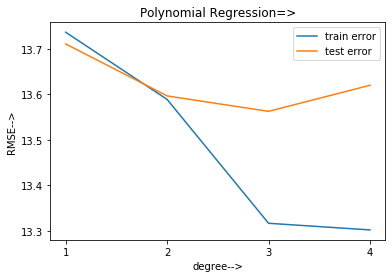

In [41]:
plt.plot(range(1,5),train_error,label='train error')

plt.plot(range(1,5),test_error,label='test error')
plt.xticks(range(1,5))
plt.title('Polynomial Regression=>')
plt.xlabel('degree-->')
plt.ylabel('RMSE-->')

plt.legend()
plt.savefig('Polynomial Regression.png')

### So our model seems to overfit at degree 4

### What overfitting means is you're overstating the impact of a given set of predictors on the response. But the only way that you can overstate the impact is if the estimated coefficients are too big (and conversely, the estimates for your excluded predictors are too small).
-  Regularisation procedures aim to fix or mitigate this problem.

In [43]:
X=df2.drop('REFILL_COUNT', axis=1).values
y=df2['REFILL_COUNT'].values

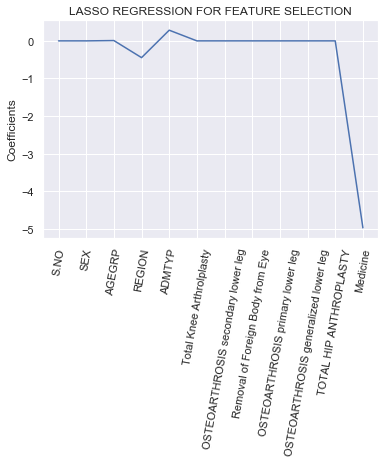

<Figure size 1152x1152 with 0 Axes>

In [55]:
from sklearn.linear_model import Lasso
names = df2.drop('REFILL_COUNT', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
sns.set()
_ = plt.plot(range(len(names)), lasso_coef)
# _ = plt.yticks(lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=80)
_ = plt.ylabel('Coefficients')
plt.title('LASSO REGRESSION FOR FEATURE SELECTION')
# plt.show()
plt.figure(figsize=(16,16))
plt.savefig('Lasso.png')